## Imports

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from math import sqrt
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Crank-Nicolson
---

In [ ]:
#Function that computes the U value for the entire grid (x,y) on the time step t
def U_analytical(M,t,x,y,h):
  for i in range(len(M)):
    for j in range(len(M)):
      M[i][j] = (1+t)*(((x[j]+h))**2+(1-y[i+1])**2)
  return M

#Function that computes the F value for the entire grid (x,y) on the time step t
def f(M,t,x,y,n):
  c=0
  for i in range(n,0,-1):
    for j in range(1,n+1):
      M[c] = (((x[j])**2+(y[i])**2)-4*(1+t))
      c+=1
  return M

#Function that computes the U value, for given values of x,y and t.
def U(x,y,t):
  return (x**2+y**2)*(1+t)

#Function that recieves two vectors, computes the difference vector and outputs its norm infinity
def inf_norm(A,N):
  A.flatten()
  N.flatten()
  V = np.abs(A-N)
  return np.max(V)

In [ ]:
def CN(n,interior_t_points):

  x = np.linspace(0,1,n+2)
  y = np.linspace(0,1,n+2)
  t = np.linspace(0,1,interior_t_points+2)    #define space and time grids

  h=x[1]-x[0]  #delta_x
  delta_t = t[1]- t[0] #delta_t

  #Build matrix A  - for the LHS of the equation, like it was defined in the report

  M=np.zeros((n*n,n*n))

  M[0][0] = (1/delta_t + 2/h**2) 
  M[0][1] =  (-1/(2*h**2))
  M[0][n] =  (-1/(2*h**2))

  for i in range(1,n-1):
    M[i][i-1] = (-1/(2*h**2))
    M[i][i] = (1/delta_t + 2/h**2) 
    M[i][i+1] = (-1/(2*h**2))
    M[i][i+n] = (-1/(2*h**2))

  M[n-1][n-1] = (1/delta_t + 2/h**2) 
  M[n-1][n-2] = (-1/(2*h**2))
  M[n-1][n-1+n] = (-1/(2*h**2))


  for i in range(1,n-1):


    M[n*i][n*i] = (1/delta_t + 2/h**2) 
    M[n*i][n*i+1] = (-1/(2*h**2))
    M[n*i][n*i-n] = (-1/(2*h**2))
    M[n*i][n*i+n] = (-1/(2*h**2))

    for j in range(1,n-1):
      M[n*i+j][n*i+j] = (1/delta_t + 2/h**2) 
      M[n*i+j][n*i+1+j] = (-1/(2*h**2))
      M[n*i+j][n*i-1+j] = (-1/(2*h**2))
      M[n*i+j][n*i-n+j] = (-1/(2*h**2))
      M[n*i+j][n*i+n+j] = (-1/(2*h**2))

    M[n*i+n-1][n*i+n-1] = (1/delta_t + 2/h**2) 
    M[n*i+n-1][n*i+n-1-1] = (-1/(2*h**2))
    M[n*i+n-1][n*i+n-1-n] = (-1/(2*h**2))
    M[n*i+n-1][n*i+n-1+n] = (-1/(2*h**2))
    
  M[n**2-n][n**2-n] = (1/delta_t + 2/h**2) 
  M[n**2-n][n**2-n + 1] = (-1/(2*h**2))
  M[n**2-n][n**2-2*n ] = (-1/(2*h**2))


  for i in range(n**2-n+1,n**2-1):
    M[i][i-1] = (-1/(2*h**2))
    M[i][i] = (1/delta_t + 2/h**2) 
    M[i][i+1] = (-1/(2*h**2))
    M[i][i-n] = (-1/(2*h**2))

  M[n**2-1][n**2-1] = (1/delta_t + 2/h**2) 
  M[n**2-1][n**2-1-1] = (-1/(2*h**2))
  M[n**2-1][n**2-1-n] = (-1/(2*h**2))

  #Build matrix B   - for the RHS of the equation

  N=np.zeros((n*n,n*n))

  N[0][0] = (1/delta_t - 2/h**2) 
  N[0][1] =  (1/(2*h**2))
  N[0][n] =  (1/(2*h**2))

  for i in range(1,n-1):
    N[i][i-1] = (1/(2*h**2))
    N[i][i] = (1/delta_t - 2/h**2) 
    N[i][i+1] = (1/(2*h**2))
    N[i][i+n] = (1/(2*h**2))

  N[n-1][n-1] = (1/delta_t - 2/h**2) 
  N[n-1][n-2] = (1/(2*h**2))
  N[n-1][n-1+n] = (1/(2*h**2))


  for i in range(1,n-1):


    N[n*i][n*i] = (1/delta_t - 2/h**2) 
    N[n*i][n*i+1] = (1/(2*h**2))
    N[n*i][n*i-n] = (1/(2*h**2))
    N[n*i][n*i+n] = (1/(2*h**2))

    for j in range(1,n-1):
      N[n*i+j][n*i+j] = (1/delta_t - 2/h**2) 
      N[n*i+j][n*i+1+j] = (1/(2*h**2))
      N[n*i+j][n*i-1+j] = (1/(2*h**2))
      N[n*i+j][n*i-n+j] = (1/(2*h**2))
      N[n*i+j][n*i+n+j] = (1/(2*h**2))

    N[n*i+n-1][n*i+n-1] = (1/delta_t - 2/h**2) 
    N[n*i+n-1][n*i+n-1-1] = (1/(2*h**2))
    N[n*i+n-1][n*i+n-1-n] = (1/(2*h**2))
    N[n*i+n-1][n*i+n-1+n] = (1/(2*h**2))
    
  N[n**2-n][n**2-n] = (1/delta_t - 2/h**2) 
  N[n**2-n][n**2-n + 1] = (1/(2*h**2))
  N[n**2-n][n**2-2*n ] = (1/(2*h**2))


  for i in range(n**2-n+1,n**2-1):
    N[i][i-1] = (1/(2*h**2))
    N[i][i] = (1/delta_t - 2/h**2) 
    N[i][i+1] = (1/(2*h**2))
    N[i][i-n] = (1/(2*h**2))

  N[n**2-1][n**2-1] = (1/delta_t - 2/h**2) 
  N[n**2-1][n**2-1-1] = (1/(2*h**2))
  N[n**2-1][n**2-1-n] = (1/(2*h**2))

  for time_step in t[1:]:
    
  #Previous solution: (previous time_step)

    if time_step == t[1]:
      U_p = np.zeros((n,n))
      U_p = U_analytical(U_p,time_step-delta_t,x,y,h)
      U_p = U_p.flatten()
    
    else:
      U_p = np.array([e for e in sol])
    
  #F vector:   (calculates f function for the points in the grid)

    f_k= np.zeros((n**2))
    f_k = f(f_k,time_step-delta_t,x,y,n)
    f_k1 = np.zeros((n**2))
    f_k1 = f(f_k1,time_step,x,y,n)

    F = (f_k+f_k1)/2
    
  #Constant vector:    (It contains the U values of points in the boundary because we have dirichlet boundary conditions)

    C=np.zeros((n,n))

    C[0][0] = U(0,1-h,time_step)*(1/(2*h**2)) + U(h,1,time_step)*(1/(2*h**2)) + U(0,1-h,time_step-delta_t)*(1/(2*h**2)) + U(h,1,time_step-delta_t)*(1/(2*h**2))

    for i in range(1,n-1):
      C[0][i] = U(h*(i+1),1,time_step)*(1/(2*h**2)) + U(h*(i+1),1,time_step-delta_t)*(1/(2*h**2))

    C[0][n-1] = U(h*n,1,time_step)*(1/(2*h**2)) + U(1,1-h,time_step)*(1/(2*h**2)) + U(h*n,1,time_step-delta_t)*(1/(2*h**2)) + U(1,1-h,time_step-delta_t)*(1/(2*h**2))

    for i in range(1,n-1):

      C[i][0] = U(0,(1-(i+1)*h),time_step)*(1/(2*h**2)) + U(0,(1-(i+1)*h),time_step-delta_t)*(1/(2*h**2))

      C[i][-1] = U(1,(1-(i+1)*h),time_step)*(1/(2*h**2)) + U(1,(1-(i+1)*h),time_step-delta_t)*(1/(2*h**2))

    C[n-1][0] = U(0,h,time_step)*(1/(2*h**2)) + U(h,0,time_step)*(1/(2*h**2)) + U(0,h,time_step-delta_t)*(1/(2*h**2)) + U(h,0,time_step-delta_t)*(1/(2*h**2))

    for i in range(1,n-1):
      C[n-1][i] = U(h*(i+1),0,time_step)*(1/(2*h**2)) + U(h*(i+1),0,time_step-delta_t)*(1/(2*h**2))

    C[n-1][n-1] = U(1,h,time_step)*(1/(2*h**2)) + U(h*n,0,time_step)*(1/(2*h**2)) + U(1,h,time_step-delta_t)*(1/(2*h**2)) + U(h*n,0,time_step-delta_t)*(1/(2*h**2))


    C=C.flatten()
    
    A = np.array([e for e in M])
    B = np.array([e for e in N.dot(U_p)+F+C])
    sol = np.linalg.solve(A, B)
    
  
  solution = np.flipud(np.array(sol.reshape((n,n))))

  X, Y = np.meshgrid(x[1:-1], y[1:-1])
  analytical_sol = U(X,Y,1)
  error = inf_norm(solution,analytical_sol)
  return solution,analytical_sol, x[1:-1],y[1:-1], error

In [ ]:
%%time
CN_20_5,Analytical_sol_20_5,x_20_5,y_20_5,err_20_5 = CN(20,5)

CPU times: user 62.7 ms, sys: 73.9 ms, total: 137 ms
Wall time: 90.3 ms


In [ ]:
%%time
CN_20_10,Analytical_sol_20_10,x_20_10,y_20_10,err_20_10 = CN(20,10)

CPU times: user 135 ms, sys: 92.9 ms, total: 227 ms
Wall time: 135 ms


In [ ]:
%%time
CN_20_20,Analytical_sol_20_20,x_20_20,y_20_20,err_20_20 = CN(20,20)

CPU times: user 282 ms, sys: 250 ms, total: 532 ms
Wall time: 445 ms


In [ ]:
%%time
CN_20_40,Analytical_sol_20_40,x_20_40,y_20_40,err_20_40 = CN(20,40)

CPU times: user 440 ms, sys: 368 ms, total: 807 ms
Wall time: 452 ms


In [ ]:
%%time
CN_20_80,Analytical_sol_20_80,x_20_80,y_20_80,err_20_80 = CN(20,80)

CPU times: user 888 ms, sys: 710 ms, total: 1.6 s
Wall time: 878 ms


In [ ]:
print("Errors:")
print(err_20_5,err_20_10,err_20_20,err_20_40,err_20_80)
print()

#THE ERROR IS 0 (this is the precision of the computer)- NO Refinement is needed

Errors:
3.9968028886505635e-15 3.552713678800501e-15 5.329070518200751e-15 4.440892098500626e-15 3.552713678800501e-15



In [ ]:
%%time
CN_12_30,Analytical_sol_12_30,x_12_30,y_12_30,err_12_30 = CN(12,30)

CPU times: user 89.8 ms, sys: 84.7 ms, total: 175 ms
Wall time: 111 ms


In [ ]:
%%time
CN_24_30,Analytical_sol_24_30,x_24_30,y_24_30,err_24_30 = CN(24,30)

CPU times: user 743 ms, sys: 538 ms, total: 1.28 s
Wall time: 1.04 s


In [ ]:
%%time
CN_48_30,Analytical_sol_48_30,x_48_30,y_48_30,err_48_30 = CN(48,30)

CPU times: user 20.6 s, sys: 4.64 s, total: 25.2 s
Wall time: 19.9 s


In [ ]:
%%time
CN_96_30,Analytical_sol_96_30,x_96_30,y_96_30,err_96_30 = CN(96,30)

CPU times: user 17min 45s, sys: 19.2 s, total: 18min 4s
Wall time: 9min 44s


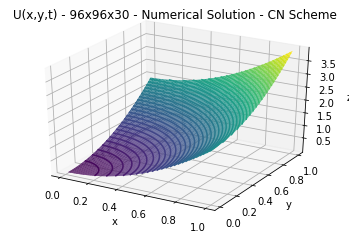

In [ ]:
X, Y = np.meshgrid(x_96_30, y_96_30)
Z = CN_96_30



fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title("U(x,y,t) - 96x96x30 - Numerical Solution - CN Scheme");

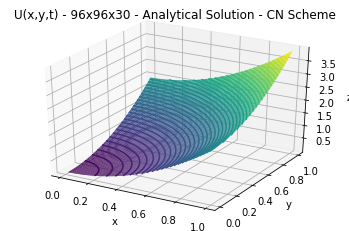

In [ ]:
X, Y = np.meshgrid(x_96_30, y_96_30)
Z = Analytical_sol_96_30



fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title("U(x,y,t) - 96x96x30 - Analytical Solution - CN Scheme"); 

# ADI

---



In [ ]:
#Function that computes the U value for the entire grid (x,y) on the time step t
def U_analytical(M,t,x,y,h):
  for i in range(len(M)):
    for j in range(len(M)):
      M[i][j] = (1+t)*(((x[j]+h))**2+(1-y[i+1])**2)
  return M


#Function that computes the F value for the entire grid (x,y) on the time step t
def f(M,t,x,y,n):
  c=0
  for i in range(n,0,-1):
    for j in range(1,n+1):
      M[c] = (((x[j])**2+(y[i])**2)-4*(1+t))
      c+=1
  return M


#Function that computes the U value, for given values of x,y and t.
def U(x,y,t):
  return (x**2+y**2)*(1+t)


#Function that recieves two vectors, computes the difference vector and outputs its norm infinity
def inf_norm(A,N):
  A.flatten()
  N.flatten()
  V = np.abs(A-N)
  return np.max(V)

In [ ]:
def ADI(n,interior_t_points): #To calculate ADI, the inputs are the number of interior points (n) on x and y axis, and number of interior points in time,t.

  x = np.linspace(0,1,n+2) #Build x-axis
  y = np.linspace(0,1,n+2) #Build y-axis
  t = np.linspace(0,1,interior_t_points+2) #Build t-axis

  h=x[1]-x[0] #h=delta_x=delta_y
  delta_t = t[1]- t[0] #delta_t

  #Build matrix M_i (LHS matrix, 1st step)
  M_i=np.zeros((n*n,n*n))

  for i in range(n**2):
    M_i[i][i] = 2/delta_t + 2/h**2
    if i == 0 or i % n == 0:
      M_i[i][i+1] = -1/h**2

    elif i == n-1 or (i+1)%n == 0:
      M_i[i][i-1] = -1/h**2

    else:
      M_i[i][i-1] = -1/h**2
      M_i[i][i+1] = -1/h**2


  #Build Matrix N_i (RHS matrix, 1st step)
  N_i=np.zeros((n*n,n*n))

  for i in range(0,n):
    N_i[i][i] = 2/delta_t - 2/h**2
    N_i[i][i+n] = 1/h**2

  for i in range(n,n**2-n):
    N_i[i][i] = 2/delta_t - 2/h**2
    N_i[i][i+n] = 1/h**2
    N_i[i][i-n] = 1/h**2

  for i in range(n**2-n,n**2):
    N_i[i][i] = 2/delta_t - 2/h**2
    N_i[i][i-n] = 1/h**2


  #Build Matrix M_j (LHS matrix, 2nd step)
  M_j=np.zeros((n*n,n*n))

  for i in range(0,n):
    M_j[i][i] = 2/delta_t + 2/h**2
    M_j[i][i+n] = -1/h**2

  for i in range(n,n**2-n):
    M_j[i][i] = 2/delta_t + 2/h**2
    M_j[i][i+n] = -1/h**2
    M_j[i][i-n] = -1/h**2

  for i in range(n**2-n,n**2):
    M_j[i][i] = 2/delta_t + 2/h**2
    M_j[i][i-n] = -1/h**2


  #Build matrix N_j (RHS matrix, 2nd step)
  N_j=np.zeros((n*n,n*n))

  for i in range(n**2):
    if i == 0 or i % n == 0:
      N_j[i][i] = 2/delta_t - 2/h**2
      N_j[i][i+1] = 1/h**2

    elif i == n-1 or (i+1)%n == 0:
      N_j[i][i] = 2/delta_t - 2/h**2
      N_j[i][i-1] = 1/h**2

    else:
      N_j[i][i-1] = 1/h**2
      N_j[i][i] = 2/delta_t - 2/h**2
      N_j[i][i+1] = 1/h**2


  
  for time_step in t[1:]:     #Start computing solutions for all time steps
  

    if time_step == t[1]:
      U_k = np.zeros((n,n))
      U_k = U_analytical(U_k,time_step-delta_t,x,y,h) #On the 1st step we have the solution of t=0
      U_k = U_k.flatten()

    else:
      U_k = np.array([e for e in sol])
      
    
    F = np.zeros((n**2))
    F = f(F,time_step-delta_t/2,x,y,n)  #RHS F functino

    
  #Constant vector:
    C_k=np.zeros((n,n)) 
    C_kh=np.zeros((n,n))  #We have to add on the RHS the constants because we have Dirichlet conditions
    
    for i in range(n):
      C_kh[i][0] = U(0,1-h*(i+1),time_step-delta_t/2)
      C_kh[i][-1] = U(1,1-h*(i+1),time_step-delta_t/2)
    
    for i in range(n):
      C_k[0][i] = U((i+1)*h,1,time_step-delta_t)
      C_k[-1][i] = U((i+1)*h,0,time_step-delta_t)
      
    C_k = C_k.flatten()
    C_kh = C_kh.flatten()
    
    C = (C_k + C_kh) * (1/h**2)
  
    
    sol = np.linalg.solve(M_i,N_i.dot(U_k)+F+C)  #Now we solve and we have the solution computed on the 1st direction, we 
                                                 #have to proceed with this solution and compute for the 2nd direction
    
  #Constant vector:

    C_kh=np.zeros((n,n))
    C_k1=np.zeros((n,n))  #We already have the two matrices computed above, F vector is the same so we only need the constants

    for i in range(n):
      C_kh[i][0] = U(0,1-h*(i+1),time_step-delta_t/2)
      C_kh[i][-1] = U(1,1-h*(i+1),time_step-delta_t/2)

    for i in range(n):
      C_k1[0][i] = U((i+1)*h,1,time_step)
      C_k1[-1][i] = U((i+1)*h,0,time_step)
    
    C_k1 = C_k1.flatten()
    C_kh = C_kh.flatten()
    
    C = (C_k1 + C_kh) * (1/h**2)


    sol = np.linalg.solve(M_j,N_j.dot([e for e in sol])+F+C) #Compute the solution and then the cycle loops until the last time step
    

  sol = np.flipud(np.array(sol.reshape((n,n)))) #Final solution has to be fliped for the graphic below

  X, Y = np.meshgrid(x[1:-1], y[1:-1])  #Before returning the solution, let's also compute the analytical solution for this particular grid
  analytical_sol = U(X,Y,1)
  err = inf_norm(sol,analytical_sol) #and also the error in infinity norm 
  
  return sol, analytical_sol,x,y,err #the function outputs the solution, the analytical solution, the grid(x and y) and the error

In [ ]:
%%time
ADI_20_5,Analytical_20_5,x_20_5,y_20_5,err_20_5 = ADI(20,5)

CPU times: user 131 ms, sys: 442 ms, total: 572 ms
Wall time: 309 ms


In [ ]:
%%time
ADI_20_10,Analytical_20_10,x_20_10,y_20_10,err_20_10 = ADI(20,10)

CPU times: user 244 ms, sys: 781 ms, total: 1.02 s
Wall time: 570 ms


In [ ]:
%%time
ADI_20_20,Analytical_20_20,x_20_20,y_20_20,err_20_20 = ADI(20,20)

CPU times: user 432 ms, sys: 1.54 s, total: 1.97 s
Wall time: 1.09 s


In [ ]:
%%time
ADI_20_40,Analytical_20_40,x_20_40,y_20_40,err_20_40 = ADI(20,40)

CPU times: user 807 ms, sys: 2.93 s, total: 3.74 s
Wall time: 1.98 s


In [ ]:
%%time
ADI_20_80,Analytical_20_80,x_20_80,y_20_80,err_20_80 = ADI(20,80)

CPU times: user 1.59 s, sys: 5.62 s, total: 7.21 s
Wall time: 3.76 s


In [ ]:
print("Errors:")
print(err_20_5,err_20_10,err_20_20,err_20_40,err_20_80)
print()
print(err_20_5/err_20_10,err_20_10/err_20_20,err_20_20/err_20_40,err_20_40/err_20_80)

#The convergence is roughly quadratic in time, like expected in the theoretical results

Errors:
0.012897542009536966 0.0037977950864238608 0.0010434193028697747 0.0002737337029785625 7.013356565188644e-05

3.3960605340826198 3.6397592760442246 3.8118042883140713 3.9030341667962754


In [ ]:
%%time
ADI_16_30, Analytical_16_30, x_16_30, y_16_30, err_16_30 = ADI(16,30)

CPU times: user 314 ms, sys: 2.03 s, total: 2.34 s
Wall time: 1.27 s


In [ ]:
%%time
ADI_24_30, Analytical_24_30, x_24_30, y_24_30, err_24_30 = ADI(24,30)

CPU times: user 1.22 s, sys: 2.61 s, total: 3.83 s
Wall time: 2.02 s


In [ ]:
%%time
ADI_48_30, Analytical_48_30, x_48_30, y_48_30, err_48_30 = ADI(48,30)

CPU times: user 40.4 s, sys: 7.49 s, total: 47.9 s
Wall time: 24.6 s


In [ ]:
%%time
ADI_96_30, Analytical_96_30, x_96_30, y_96_30, err_96_30 = ADI(96,30)

CPU times: user 35min 10s, sys: 34.8 s, total: 35min 45s
Wall time: 19min 9s


In [ ]:
print("Errors:")
print(err_16_30,err_24_30,err_48_30,err_96_30)
print()
#The error is approx. the same for the same delta_t, but for different space grids, like expected in the theoretical results

print(err_16_30/err_24_30,err_24_30/err_48_30,err_48_30/err_96_30)

Errors:
0.00046899262642946526 0.00048548405116344284 0.0005025663048452422 0.0005113592923549071

0.9660309649833881 0.9660099502948977 0.9828046783521397


## Some plots for the ADI 

---



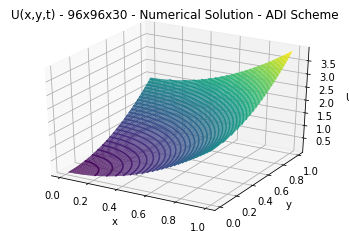

In [ ]:
X, Y = np.meshgrid(x_96_30[1:-1], y_96_30[1:-1])
Z = ADI_96_30

fig = plt.figure()
ax = plt.axes(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.contour3D(X, Y, Z, 50)#, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('U')
ax.set_title("U(x,y,t) - 96x96x30 - Numerical Solution - ADI Scheme");

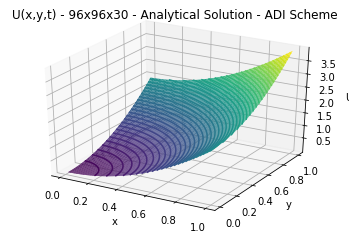

In [ ]:
X, Y = np.meshgrid(x_96_30[1:-1], y_96_30[1:-1])
Z = Analytical_96_30

fig = plt.figure()
ax = plt.axes(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.contour3D(X, Y, Z, 50)#, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('U')
ax.set_title("U(x,y,t) - 96x96x30 - Analytical Solution - ADI Scheme");